# Question-1

In [137]:
from __future__ import division
import numpy as np


import random
import matplotlib.pyplot as plt
np.random.seed(10)
data_list=[]
weight_list=[]
gradient_list=[]
with open('pattern1.txt', 'r') as var:
    for line in var:
         data_list.extend(line.rstrip().split(" "))
data=np.array(data_list, dtype=float).reshape(2 * 13, 156)

label=['{0:05b}'.format(i) for i in range(1,27)]
label=[[int(i) for i in label] for label in label]
actual_label=np.array(label)


In [138]:
def ascii_converter(ascii_no):
    char=''.join(chr(int(ascii_no[i*8:i*8+8],2)) for i in range(len(ascii_no)//8))
    
    return char

def  char_print(act):
    
    char_string=np.array(np.rint(act[1]),dtype=int).flatten()
    k="010"+''.join(map(str, char_string))
    print ascii_converter(k)
    

def for_oropogate(data1,list,no_of_layer):
    
    activation_list = []
    data1=np.array(data1)

    for i in range(no_of_layer):
        x=np.matmul(data1,np.array(list[i]).transpose())
        n=np.e**(-x)
        n=1/(n+1)
        activation_list.append(n)
        data1=n
    return activation_list

def back_prop(list,error,no_of_layer,activation_list):
    delta=[]
    for i in reversed(range(no_of_layer)):
        if i==0:
            continue
        else:
            z=np.matmul(np.array(error),np.array(list[i]))

            actv=np.array(activation_list[i-1])*(1-np.array(activation_list[i-1]))
            z=z*actv
            delta.append(z)
    return delta

def update_weights(delta,weight_list,no_of_layes,gradient_list,activation_list,data1):
    for i in range(no_of_layes):
        gradient_list[i]=0.9*gradient_list[i]+np.matmul(np.array(delta[i]).transpose(),data1)

        weight_list[i]=weight_list[i] +0.01*gradient_list[i]
        data1=activation_list[i]
    return weight_list,gradient_list


In [139]:
def initialize_terms(hidden_no,output_no,data):
   
    weights_hidden=np.array([np.random.rand(data.shape[1]) for i in range(hidden_no)])*0.05

    dwh=np.zeros(weights_hidden.shape)
    gradient_list.append(dwh)
    weight_list.append(weights_hidden)
    weights_output=np.array([np.random.rand(hidden_no) for i in range(output_no)])*0.05
    dwo=np.zeros(weights_output.shape)
    gradient_list.append(dwo)
    weight_list.append(weights_output)
    
    return weight_list,gradient_list

    

In [140]:
def main_method(epoch,network_layer,data,no_of_input):
    error_list=[]
    corelation_term_list=[]
    weight_list,gradient_list=initialize_terms(no_of_input,5,data)
    for i in range(epoch):

        activation_list=for_oropogate(data, weight_list,network_layer )
        corelation_term=np.mean(np.corrcoef(actual_label,activation_list[1]))
        corelation_term_list.append(corelation_term)
        error=np.subtract(actual_label,activation_list[1])
        error_list.append(np.sum(abs(error)))
        actual = activation_list[1] * (1 - activation_list[1])
        error = error * actual
        delta=back_prop(weight_list, error, network_layer, activation_list)
        delta.append(error)
        weight_list, gradient_list=update_weights(delta, weight_list, network_layer, gradient_list, activation_list, data)
        
    return error_list,weight_list,corelation_term_list
    

In [141]:
def graph_plot(error_list):
    plt.xlabel("Iteration")
    plt.ylabel("Absolute difference")
    plt.plot(error_list)
    plt.show()

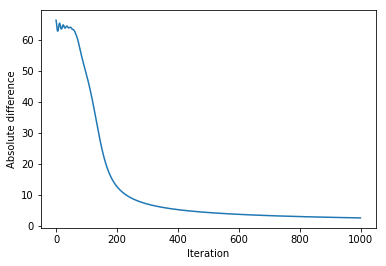

In [142]:
error_list,weight_list,corelation_term_list=main_method(1000,2,data,25)


graph_plot(error_list)



# Question3

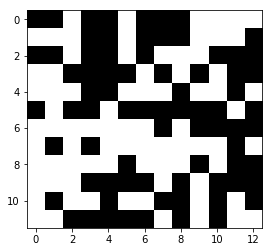

In [143]:
data2_list=[]
data2_2=np.loadtxt("pattern2.txt").tolist()
with open('pattern2.txt', 'r') as var:
    for line in var:
         data2_list.extend(line.rstrip().split(" "))
data2_list=[float(s) for s in data2_list if s is not ""]
data2=np.array(data2_list,dtype=int).reshape(1*1,156)

plt.imshow(data2_2,cmap='gray')
plt.show()


In [144]:

act=for_oropogate(data2,weight_list,2)
char_print(act)


K


## The letter predicted by the model is K.

#  Question2

### Noise Implementation:
#### I implemented noise by first replacing some percentage of zeros with ones in the data. I also made some percentage of ones in data and replaced it with zero. Then I tried predicting the data with my trained model on real data and found the given results shown below. My model performed well when I tried 20% percentage change to the data. I got 90 percent accuracy on implementing noise to 20 percent of data. I have shown my results with my predicted character below.


In [145]:
new_data_list=[]
with open('pattern1.txt', 'r') as var:
    for line in var:
         new_data_list.extend(line.rstrip().split(" "))
new_data=np.array(new_data_list, dtype=float).reshape(2 * 13, 156)

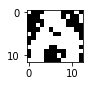

A


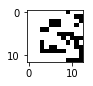

B


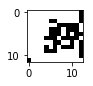

C


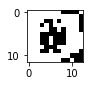

D


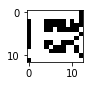

E


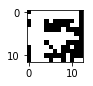

F


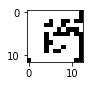

G


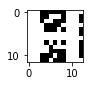

H


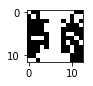

H


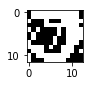

J


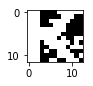

K


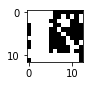

L


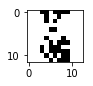

M


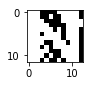

N


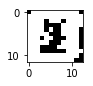

O


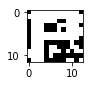

P


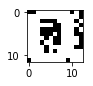

Q


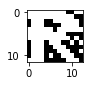

P


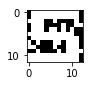

C


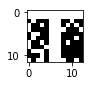

T


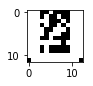

U


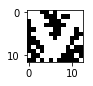

V


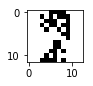

W


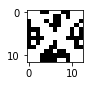

X


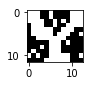

Y


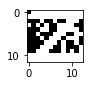

Z


In [146]:
noise_data=[]

for data in new_data:
    data=np.array(data)
    plt.figure(figsize=(1,1))

    zero_in=np.argwhere(data==0).flatten()
    c=int(0.20*len(data))
    for i in range(c):
        data[np.random.choice(zero_in)]=1
    plt.imshow(data.reshape(12,13),cmap='gray')
    plt.show()
    act=for_oropogate(data,weight_list,2)
    char_print(act)
    noise_data.append(data)
    
    

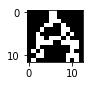

A


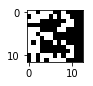

J


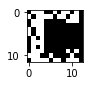

B


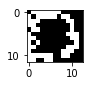

B


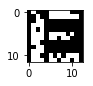

A


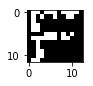

B


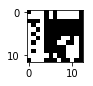

G


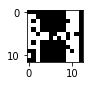

K


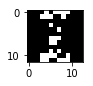

K


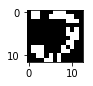

J


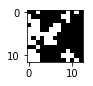

K


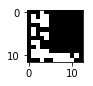

L


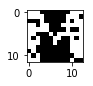

M


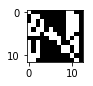

J


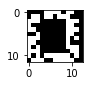

I


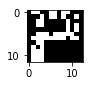

@


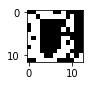

P


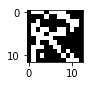

R


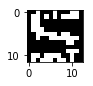

Q


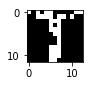

T


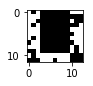

E


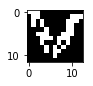

P


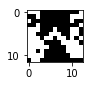

W


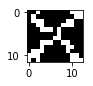

X


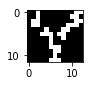

Y


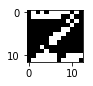

Z


In [153]:
for data in new_data:
    data=np.array(data)
    plt.figure(figsize=(1,1))

    zero_in=np.argwhere(data!=0).flatten()
    c=int(0.20*len(data))
    for i in range(c):
        data[np.random.choice(zero_in)]=0
    plt.imshow(data.reshape(12,13),cmap='gray')
    plt.show()
    act=for_oropogate(data,weight_list,2)
    char_print(act)
    

### we have change the 20 percentage of ones in data to zeros and found that our model makes mistake while predicting as shown above.

# Questtion4

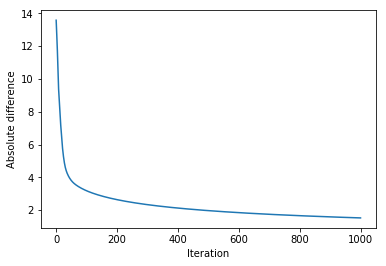

In [148]:
error_list,weight_list_noise,corelation_term_list=main_method(1000,2,np.array(noise_data),25)

graph_plot(error_list)

 ### I trained my model on 20 percentage noise data and tried predicting the output of orignal data to check the accuracy of the model. It was able to predict all the characters successfully as shown below. I have even plotted the training curve for noise data as shown above.

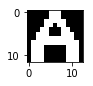

A


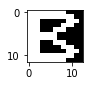

B


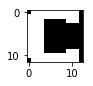

C


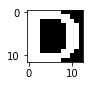

D


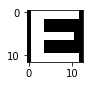

E


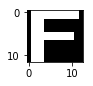

F


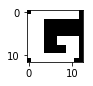

G


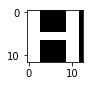

H


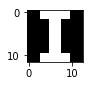

I


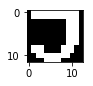

J


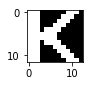

K


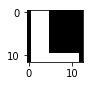

L


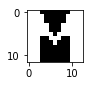

M


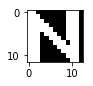

N


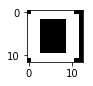

O


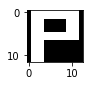

P


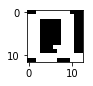

Q


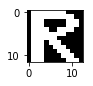

R


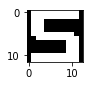

S


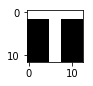

T


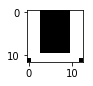

U


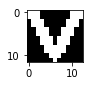

V


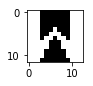

W


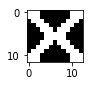

X


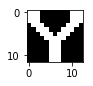

Y


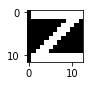

Z


In [149]:

for data in new_data:
    plt.figure(figsize=(1,1))

    data=np.array(data)
    plt.imshow(data.reshape(12,13),cmap='gray')
    plt.show()
    act=for_oropogate(data,weight_list_noise,2)
    char_print(act)
    noise_data.append(data)

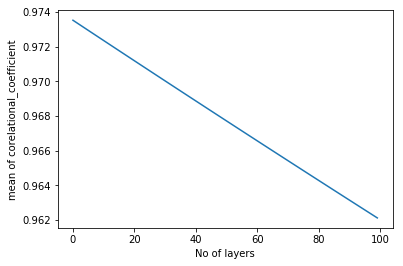

In [152]:
mean_error=[]

for i in range(1,10):
    error_list,weight_list,corelation_term_list=main_method(100,2,new_data,i)
    
    mean_er=np.mean(corelation_term_list)
    
    mean_error.append(mean_er)

plt.xlabel("No of layers")
plt.ylabel("mean of corelational_coefficient")
plt.plot(error_list)
plt.show()

    

### As shown in above graph the error reduces as we increase the no of hidden nodes. We have to make sure that we don't over fit the data. Initially we start with one or two nodes and calculate the predicted value. Now check the correlation coefficient of these predicted values with actual values. We have plotted mean of corelation coefficient for each layer and found that as no of layers increses out coefficient decreases linearly. 